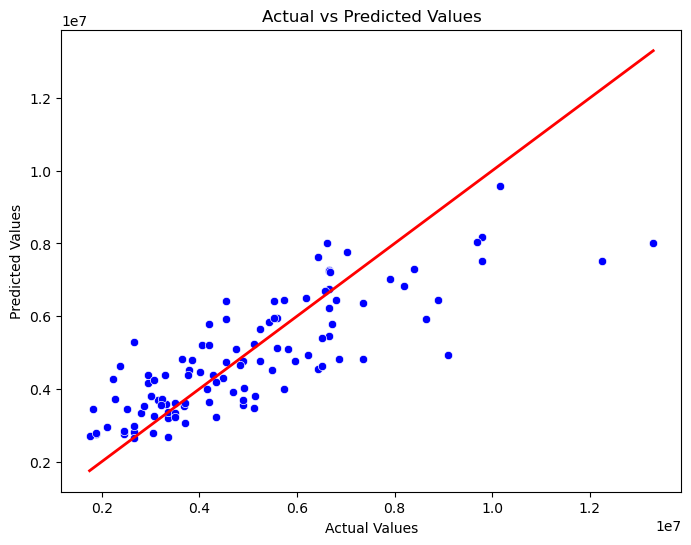

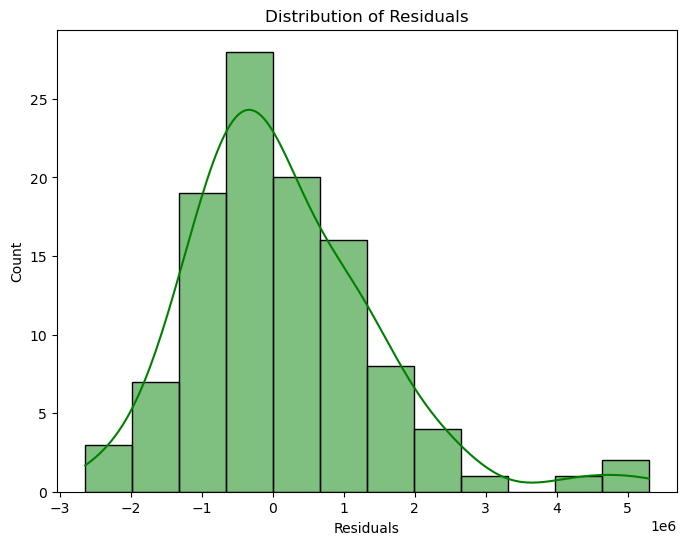

In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\maxwe\Downloads\Housing.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Data exploration and cleaning
# Checking for missing values
missing_values = df.isnull().sum()

# Separating numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Filling missing values in numerical columns with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Encoding categorical columns
for col in categorical_columns:
    unique_values = df[col].unique()
    if 'yes' in unique_values or 'no' in unique_values:
        df[col] = df[col].map({'yes': 1, 'no': 0})
    elif 'furnished' in unique_values or 'unfurnished' in unique_values:
        df[col] = df[col].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Dropping duplicates
df = df.drop_duplicates()

# Identifying features and target
target_column = 'price'  # Assuming 'price' is the target column
if target_column not in df.columns:
    target_column = df.columns[-1]  # Default to the last column if not specified

features = df.drop(columns=[target_column]).columns.tolist()
X = df[features]
y = df[target_column]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizations
# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()